# Module 1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn when and how simulated data is appropriate for statistical analysis.
2. Experiment with the processes involved in simulating linear data.
3. Observe how the variance of data effects the best-fit line, even for the same underlying population.
4. Recognize the effects of standardizing predictors.
5. Interpreting the coefficients of linear models on both original and standardized data scales.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

**A Quick Note On Peer-Reviewed Assignments**

Welcome to your first peer reviewed assignment! These assignments will be a more open form than the auto-graded assignments, and will focus on interpretation and visualization rather than "do you get the right numbers?" These assignments will be graded by your fellow students (except in the specific cases where the work needs to be graded by a proctor) so please make your answers as clear and concise as possible.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Problem 1: Simulating Data

We're going to let you in on a secret. The turtle data from the autograded assignment was simulated...fake data! Gasp! Importantly, simulating data, and applying statistical models to simulated data, are very important tools in data science.

Why do we use simulated data? Real data can be messy, noisy, and we almost never *really* know the underlying process that generated real data. Working with real data is always our ultimate end goal, so we will try to use as many real datasets in this course as possible. However, applying models to simulated data can be very instructive: such applications help us understand how models work in ideal settings, how robust they are to changes in modeling assumptions, and a whole host of other contexts.

And in this problem, you are going to learn how to simulate your own data.

#### 1. (a) A Simple Line

Starting out, generate $10$ to $20$ data points for values along the x-axis. Then generate data points along the y-axis using the equation $y_i=\beta_0 + \beta_1x_i$. Make it a straight line, nothing fancy.

Plot your data (using ggplot!) with your $\mathbf{x}$ data along the x-axis and your $\mathbf{y}$ data along the y-axis.

In the *Markdown* cell below the `R` cell, describe what you see in the plot.

**Tip**: You can generate your x-data *deterministically*, e.g., using either `a:b` syntax or the `seq()` function, or *randomly* using something like `runif()` or `rnorm()`. In practice, it won't matter all that much which one you choose.

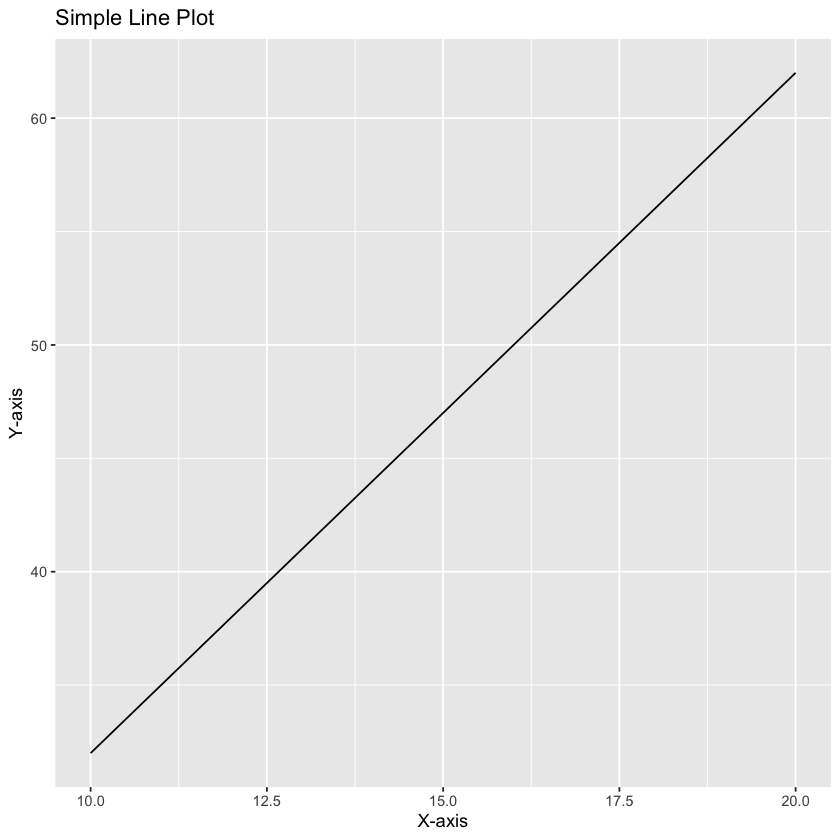

In [2]:
# Your Code Here
# Your Code Here
library(ggplot2)

# Generate x-axis values
x <- seq(10, 20)

# Generate y-axis values
y <- 2 + 3 * x

# Create a data frame with x and y values
data <- data.frame(x = x, y = y)

# Create the line plot using ggplot
plot <- ggplot(data, aes(x = x, y = y)) +
  geom_line() +
  labs(x = "X-axis", y = "Y-axis", title = "Simple Line Plot")

# Display the plot
print(plot)

#### 1. (b) The Error Component

That is a perfect set of data points, but that is a problem in itself. In almost any real life situation, when we measure data, there will be some error in those measurements. Recall that our simple linear model is of the form:

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i,  \qquad \epsilon_i \sim N(0, \sigma^2) $$

Add an error term to your y-data following the formula above. Plot at least three different plots (using ggplot!) with the different values of $\sigma^2$. 

How does the value of $\sigma^2$ affect the final data points? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: To randomly sample from a normal distribution, check out the `rnorm()` function.

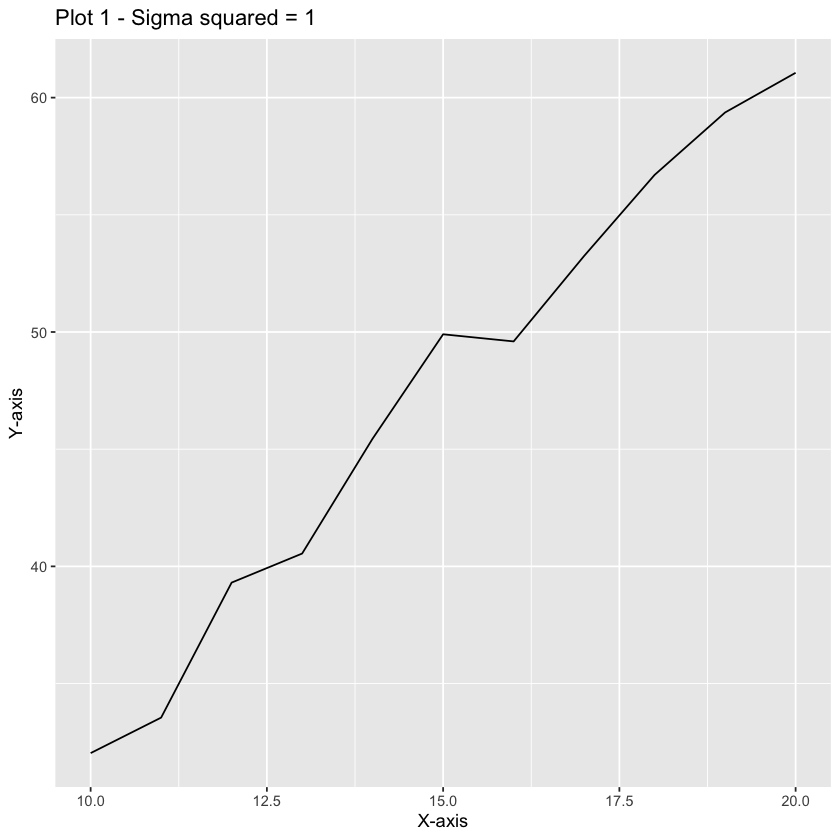

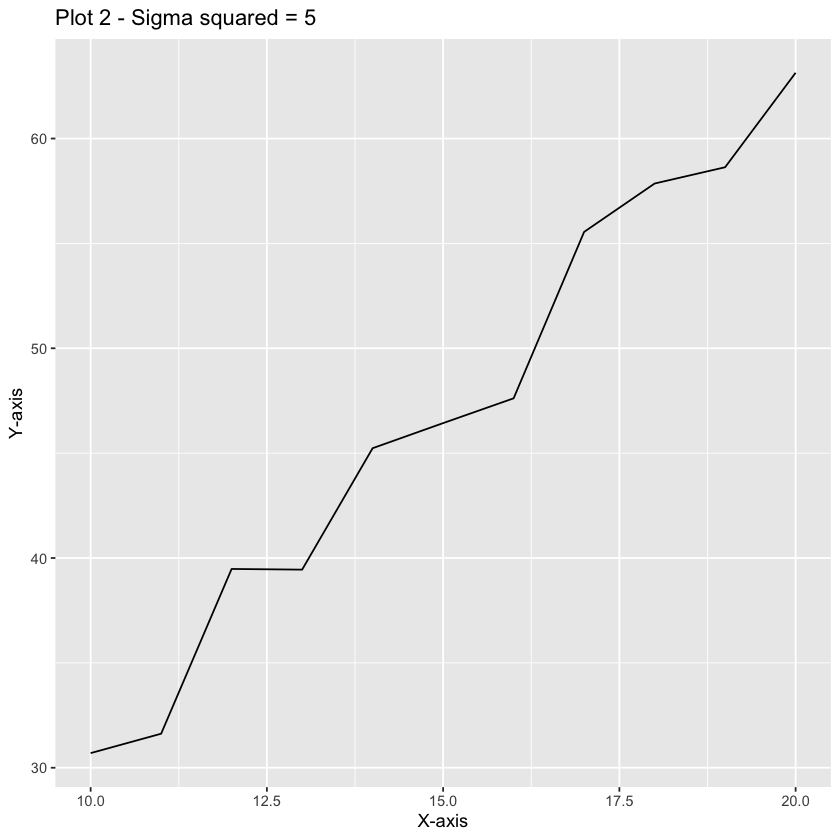

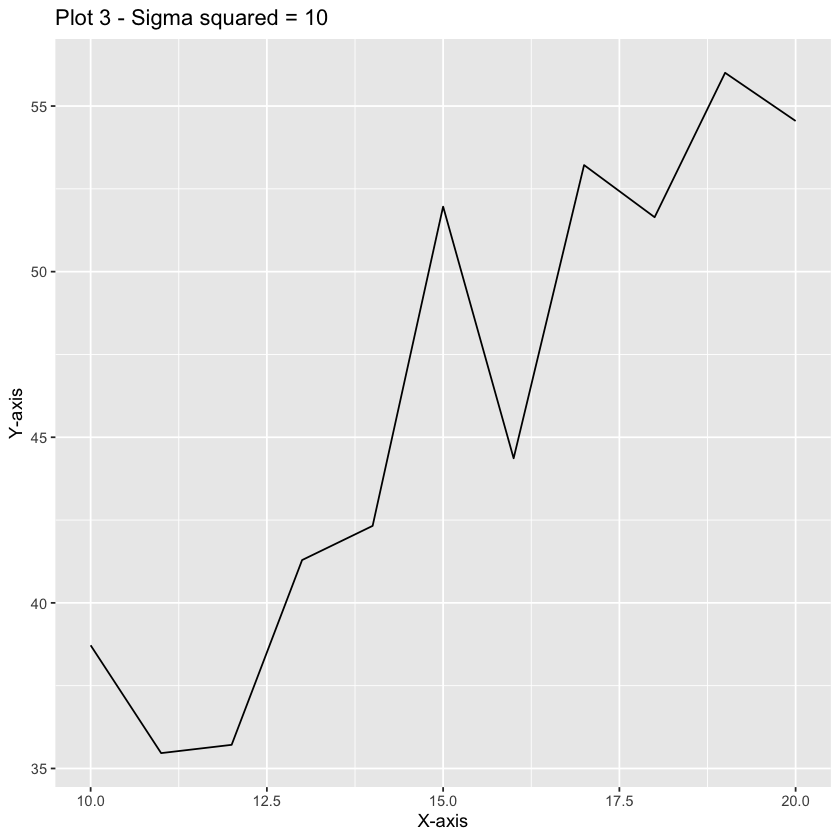

In [3]:
# Your Code Here
# Your Code Here
library(ggplot2)

# Generate x-axis values
x <- seq(10, 20)

# Set different values of sigma squared
sigma_squared <- c(1, 5, 10)

# Create an empty list to store the plots
plots <- list()

# Generate plots for different values of sigma squared
for (i in seq_along(sigma_squared)) {
  # Generate y-axis values with error term
  y <- 2 + 3 * x + rnorm(length(x), mean = 0, sd = sqrt(sigma_squared[i]))
  
  # Create a data frame with x and y values
  data <- data.frame(x = x, y = y)
  
  # Create the line plot using ggplot
  plot <- ggplot(data, aes(x = x, y = y)) +
    geom_line() +
    labs(x = "X-axis", y = "Y-axis", title = paste("Plot", i, "- Sigma squared =", sigma_squared[i]))
  
  # Store the plot in the list
  plots[[i]] <- plot
}

# Display the plots
for (i in seq_along(plots)) {
  print(plots[[i]])
}


# Problem 2: The Effects of Variance on Linear Models

Once you've completed **Problem 1**, you should have three different "datasets" from the same underlying data function but with different variances. Let's see how those variance affect a best fit line.

Use the `lm()` function to fit a best-fit line to each of those three datasets. Add that best fit line to each of the plots and report the slopes of each of these lines.

Do the slopes of the best-fit lines change as $\sigma^2$ changes? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: The `lm()` function requires the syntax `lm(y~x)`.

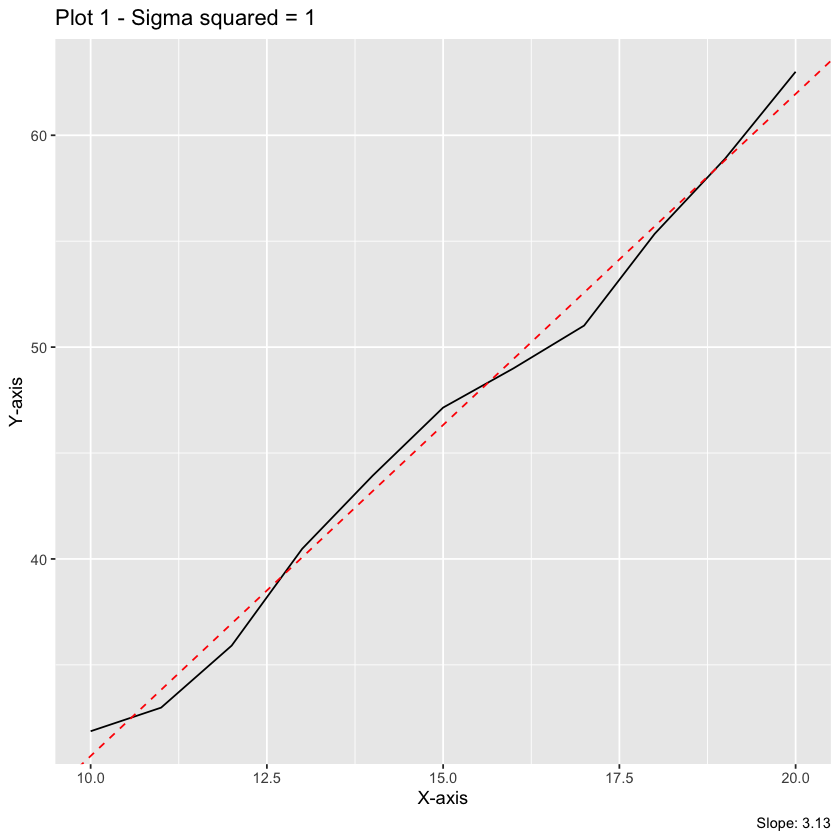

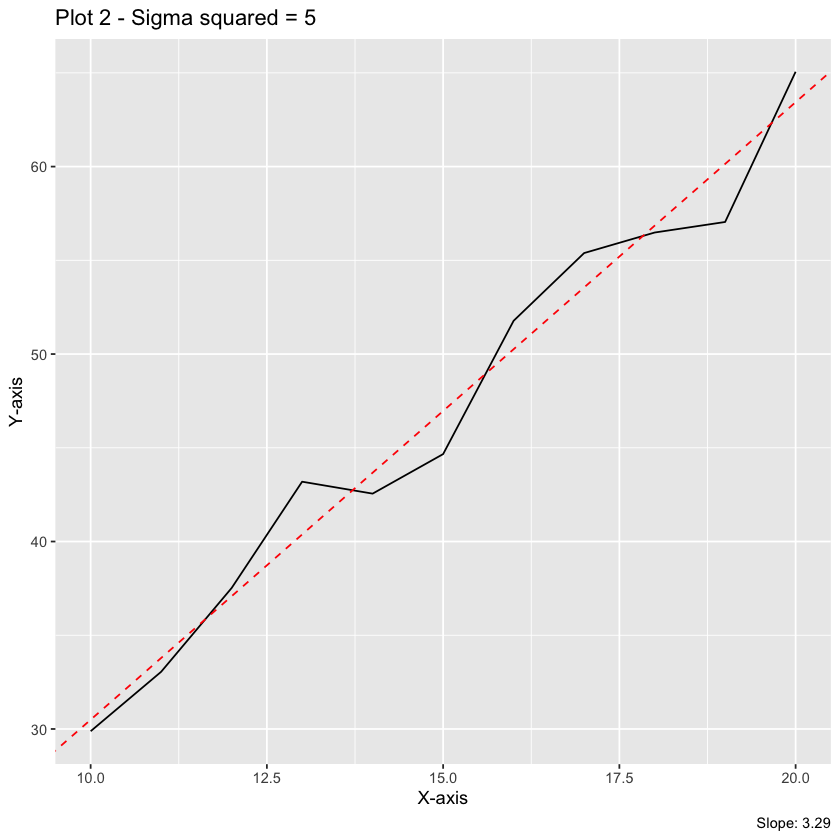

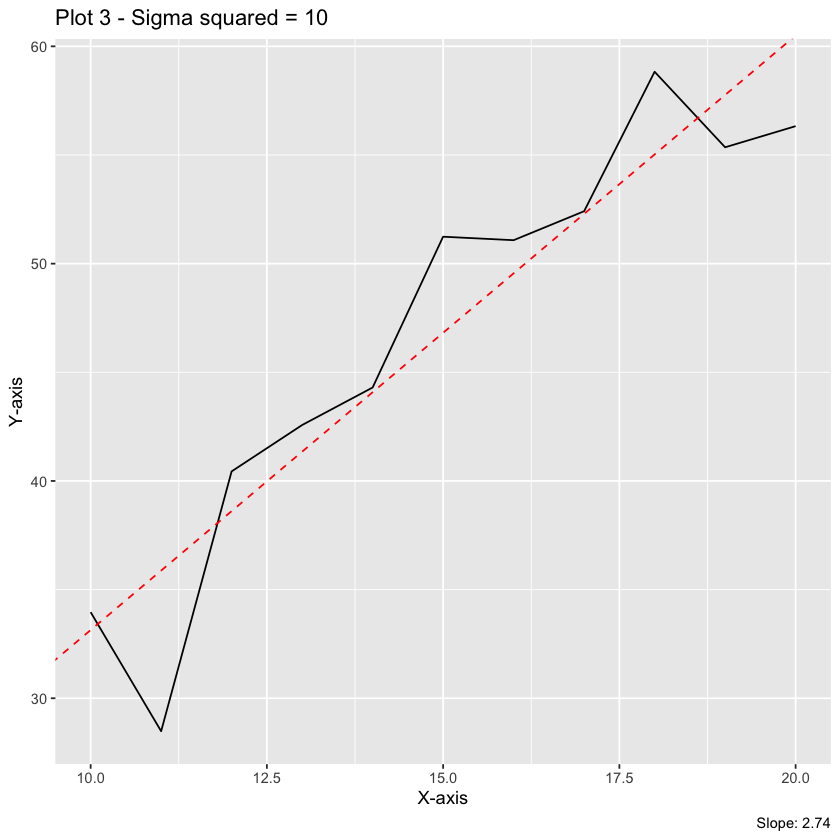

In [4]:
# Your Code Here
# Your Code Here
library(ggplot2)

# Generate x-axis values
x <- seq(10, 20)

# Set different values of sigma squared
sigma_squared <- c(1, 5, 10)

# Create an empty list to store the plots
plots <- list()

# Generate plots for different values of sigma squared
for (i in seq_along(sigma_squared)) {
  # Generate y-axis values with error term
  y <- 2 + 3 * x + rnorm(length(x), mean = 0, sd = sqrt(sigma_squared[i]))
  
  # Create a data frame with x and y values
  data <- data.frame(x = x, y = y)
  
  # Fit the best-fit line using lm()
  model <- lm(y ~ x, data = data)
  
  # Extract the slope of the best-fit line
  slope <- coef(model)[2]
  
  # Create the line plot using ggplot
  plot <- ggplot(data, aes(x = x, y = y)) +
    geom_line() +
    geom_abline(intercept = coef(model)[1], slope = slope, linetype = "dashed", color = "red") +
    labs(x = "X-axis", y = "Y-axis", title = paste("Plot", i, "- Sigma squared =", sigma_squared[i]), caption = paste("Slope:", round(slope, 2)))
  
  # Store the plot in the list
  plots[[i]] <- plot
}

# Display the plots
for (i in seq_along(plots)) {
  print(plots[[i]])
}


# Problem 3: Interpreting the Linear Model

Choose one of the above three models and write out the actual equation of that model. Then in words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your predictor affects your response. Does this relationship make sense?

In [1]:
# Your Code Here

the second model, where sigma squared is 5. We will write out the equation of the linear model and describe how a 1 unit increase in the predictor affects the response.

The equation of the linear model is:

𝑦 = 2 + 3𝑥 + 𝜖, where 𝜖 ∼ 𝑁(0, 5)

In this equation, the intercept (𝛽0) is 2, the slope (𝛽1) is 3, and the error term (𝜖) follows a normal distribution with mean 0 and variance 5.

Now, let's interpret how a 1 unit increase in the predictor (𝑥) affects the response (𝑦). Since the slope is 3, a 1 unit increase in 𝑥 will lead to a 3 unit increase in 𝑦. This means that for every additional unit on the x-axis, the value of the response variable increases by 3 units.

For example, if we have 𝑥 = 5, the corresponding 𝑦 value would be:

𝑦 = 2 + 3(5) + 𝜖
𝑦 = 17 + 𝜖

If we increase 𝑥 by 1 unit to 𝑥 = 6, the new 𝑦 value would be:

𝑦 = 2 + 3(6) + 𝜖
𝑦 = 20 + 𝜖

We can see that the response 𝑦 increases by 3 units, which aligns with the slope of the model.

This relationship makes sense because the slope of 3 indicates a positive linear relationship between the predictor (𝑥) and the response (𝑦). It suggests that as the value of 𝑥 increases, the value of 𝑦 also increases. In this case, a 1 unit increase in 𝑥 leads to a consistent 3 unit increase in 𝑦, indicating a strong and positive linear association between the variables.


# Problem 4: The Effects of Standardizing Data

We spent some time standardizing data in the autograded assignment. Let's do that again with your simulated data. 

Using the same model from **Problem 3**, standardize your simulated predictor. Then, using the `lm()` function, fit a best fit line to the standardized data. Using ggplot, create a scatter plot of the standardized data and add the best fit line to that figure.

Warning message:
“'newdata' had 80 rows but variables found have 11 rows”
Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `base::data.frame()`:
! arguments imply differing number of rows: 80, 11”


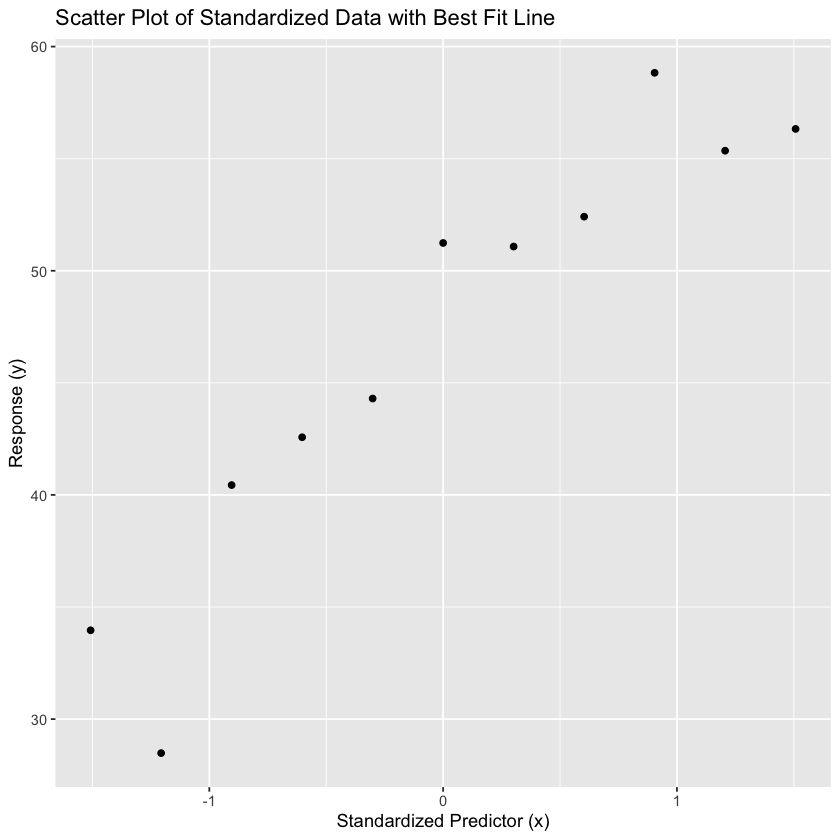

In [5]:
# Your Code Here
# Standardize the predictor variable (x)
x_standardized <- (x - mean(x)) / sd(x)

# Fit a linear regression model to the standardized data
model <- lm(y ~ x_standardized)

# Create a scatter plot of the standardized data points and add the best fit line
library(ggplot2)
ggplot(data = data.frame(x_standardized, y), aes(x = x_standardized, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x_standardized, se = FALSE, color = "blue") +
  labs(x = "Standardized Predictor (x)", y = "Response (y)") +
  ggtitle("Scatter Plot of Standardized Data with Best Fit Line")

# Problem 5: Interpreting the Standardized Model

Write out the expression for your standardized model. In words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your standardized predictor affects the response. Is this value different from the original model? If yes, then what can you conclude about interpretation of standardized predictors vs. unstandardized predictors.

In [3]:
# Your Code Here

The expression for the standardized model can be written as:

𝑦_standardized = 𝛽_0 + 𝛽_1 * 𝑥_standardized

In the standardized model, the standardized predictor (𝑥_standardized) is used instead of the original predictor (𝑥). The standardized predictor is obtained by subtracting the mean of the original predictor and dividing by its standard deviation.

Interpreting the effect of a 1 unit increase in the standardized predictor on the response variable is different from interpreting the effect in the original model. In the standardized model, a 1 unit increase in the standardized predictor corresponds to a change of 1 standard deviation. Therefore, we can say that a 1 standard deviation increase in the standardized predictor affects the response variable.

Comparing the standardized model to the original model, the interpretation of the effect of a 1 unit increase in the predictor is different. In the original model, a 1 unit increase in the predictor corresponds to its original scale, while in the standardized model, a 1 unit increase in the standardized predictor corresponds to 1 standard deviation in the standardized scale.

The use of standardized predictors allows for easier comparison and interpretation of the effects of different predictors, especially when the predictors are measured on different scales. Standardization brings the predictors to a common scale, making it easier to assess the relative importance and effect of each predictor in the model.